# 현 경제상황 내 추천할만한 기업 찾아보기

## 섹터 선택하기

In [36]:
import yfinance as yf       # Yahoo Finance 데이터를 이용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [37]:
# 섹터의 트랜드를 분석


# 2020년 ~ 2025년의 섹터 관련 데이터 가져오기
start_date = '2020-01-01'
end_date = '2025-02-17'

sectors = {
    'Manufacturing': 'IPMAN',       # 제조업 생산지수
    'Financial': 'USFIRE',          # 미국 금융, 보험, 부동산 섹터의 경제지표
    'Technology': 'NASDAQCOM',      # 나스닥 종합 지수 - 기술 섹터의 전반적인 성과 대표
    'Energy': 'IPG211S'              # 에너지 섹터의 산업 생산 지수
}

sector_data = {}    # Key: 섹터명, Value: 데이터프레임

for sector_name, symbol in sectors.items():
    df = web.DataReader(symbol, 'fred', start_date, end_date)
    sector_data[sector_name] = df

In [49]:
sector_data['Technology'] = sector_data['Technology'].resample('MS').first()    # 일별 데이터 -> 월별(월초) 데이터 변환

sector_data_integrated = pd.concat([sector_data['Manufacturing'], sector_data['Financial'], sector_data['Technology'], sector_data['Energy']], axis=1)
sector_data_integrated.columns = ['Manufacturing', 'Financial', 'Technology', 'Energy']

sector_data_integrated

,Manufacturing,Financial,Technology,Energy
DATE,,,,
2020-01-01,98.8309,8833.0,9092.19,136.6741
2020-02-01,99.0603,8871.0,9273.40,135.1813
2020-03-01,94.5462,8855.0,8952.16,134.7301
2020-04-01,79.9564,8590.0,7360.58,127.4031
2020-05-01,83.5072,8607.0,8604.95,107.9432
...,...,...,...,...
2024-10-01,98.9205,9178.0,17910.36,146.4660
2024-11-01,99.1948,9194.0,18239.92,144.9943
2024-12-01,99.7468,9213.0,19403.95,147.2418


In [52]:
# 데이터 정규화
sector_data_norm = sector_data_integrated / sector_data_integrated.iloc[0] * 100        # 처음 값을 100으로 맞춤 (%로 비교 위함)

sector_data_norm

,Manufacturing,Financial,Technology,Energy
DATE,,,,
2020-01-01,100.000000,100.000000,100.000000,100.000000
2020-02-01,100.232114,100.430205,101.993029,98.907767
2020-03-01,95.664615,100.249066,98.459887,98.577638
2020-04-01,80.902228,97.248953,80.954973,93.216710
2020-05-01,84.495031,97.441413,94.641115,78.978534
...,...,...,...,...
2024-10-01,100.090660,103.905808,196.986205,107.164415
2024-11-01,100.368205,104.086947,200.610854,106.087620
2024-12-01,100.926734,104.302049,213.413380,107.732043


섹터별 성과 비교치를 보았을 때, **기술 섹터**가 성과를 제일 잘 냈음을 알 수 있습니다.

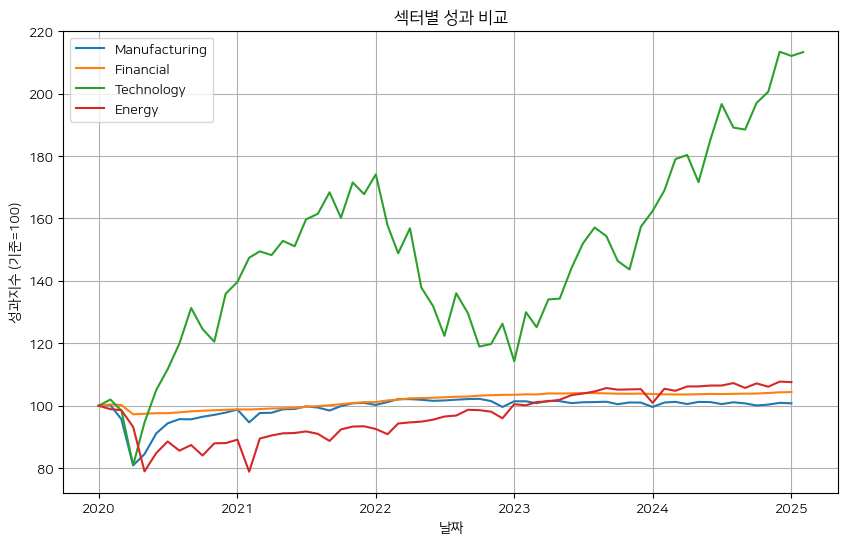

In [54]:
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumSquare')    # 폰트 설정

# 각 섹터별 라인 플롯
for column in sector_data_norm.columns:
    plt.plot(sector_data_norm.index, sector_data_norm[column], label=column)    # plt.plot(x축, y축, 범례 이름)

plt.title('섹터별 성과 비교')
plt.xlabel('날짜')
plt.ylabel('성과지수 (기준=100)')
plt.legend()
plt.grid(True)
plt.show()